## 0. Import Dependencies

In [53]:
!pip install opencv-python
!pip install imutils
!pip install easyocr

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from easyocr import *

In [55]:
import imutils
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 1. Read in Image, Grayscale and Blur

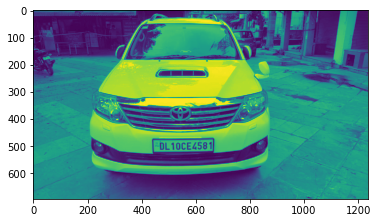

In [56]:
img = cv2.imread('11.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

## 2. Apply filter and find edges for localization

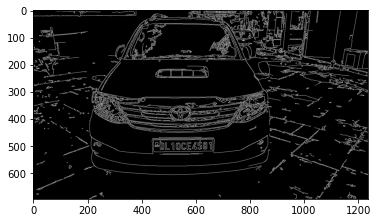

In [57]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [58]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [59]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [60]:
location

array([[[664, 477]],

       [[445, 478]],

       [[445, 517]],

       [[662, 519]]], dtype=int32)

In [61]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

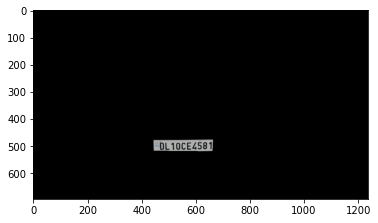

In [62]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [63]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

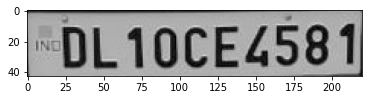

In [64]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [65]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[15, 1], [220, 1], [220, 43], [15, 43]], 'DL1OCEL581', 0.8835256188407957)]

## 5. Render Result

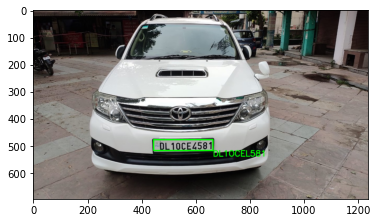

In [66]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [67]:
states={"AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam","BR":"Bihar","CH":"Chandigarh","DN":"Dadra and Nagar Haveli","DD":"Daman and Diu","DL":"Delhi","GA":"Goa","GJ":"Gujarat",
"HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","KA":"Karnataka","KL":"Kerala","LD":"Lakshadweep","MP":"Madhya Pradesh","MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland",
"OD":"Odissa","PY":"Pondicherry","PN":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"TamilNadu","TR":"Tripura","UP":"Uttar Pradesh", "WB":"West Bengal","CG":"Chhattisgarh","TS":"Telangana","JH":"Jharkhand","UK":"Uttarakhand"}
stat = text[0:2]
try:
# Fetch the State information
    print('Car Belongs to',states[stat])
except:
    print('State not recognised!!')

Car Belongs to Delhi
